# 1. Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Write Function

### 2.1 Normalization

In [2]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm

In [3]:
def min4norm(Data):
    _min = Data.min(axis=0, keepdims = True)
    return _min

In [4]:
def max4norm(Data):
    _max = Data.max(axis=0, keepdims = True)
    return _max

### 2.2 วัดระยะห่างระหว่างข้อมูลแต่ละตัวใน Validation Set กับข้อมูลทุกตัวใน Training Set

In [5]:
def KNN_find_distance_each_data(X_Train, X_Valid):
    all_distance = []
    for x_valid in X_Valid:
        distance = KNN_find_distance(X_Train, x_valid)
        all_distance.append(distance)
    return all_distance

In [6]:
def KNN_find_distance(X_Train, x_valid):
    distance2 = ((X_Train - x_valid)**2).sum(axis=1)
    distance = np.sqrt(distance2)
    return distance

### 2.3 เรียงลำดับ Target ตามระยะห่าง

In [7]:
def KNN_find_sorted_target_each_data(Y_Train, all_distance):
    all_sorted_target = []
    for distance in all_distance:
        sorted_target = KNN_sort_target_by_distance(Y_Train, distance)
        all_sorted_target.append(sorted_target)
    return all_sorted_target

In [8]:
def KNN_sort_target_by_distance(Y_Train, distance):
    sorted_target = Y_Train[distance.argsort()]
    return sorted_target

### 2.4 หาผลลัพธ์จากเพื่อนบ้านที่ใกล้ที่สุด K ตัว

#### 2.4.1 KNN-C

In [9]:
def KNNC_find_class_each_data(all_sorted_target, K):
    all_class = []
    for sorted_target in all_sorted_target:
        _class = KNNC_find_class(sorted_target, K)
        all_class.append(_class)
    all_class = np.array(all_class).reshape(-1, 1)
    return all_class

In [10]:
def KNNC_find_class(sorted_target, K):
    unique, count_unique = np.unique(sorted_target[:K, :], return_counts = True)
    _class = unique[count_unique.argmax()]
    return _class

#### 2.4.2 KNN-R

In [11]:
def KNNR_find_value_each_data(all_sorted_target, K):
    all_value = []
    for sorted_target in all_sorted_target:
        value = KNNR_find_value(sorted_target, K)
        all_value.append(value)
    all_value = np.array(all_value).reshape(-1, 1)
    return all_value

In [12]:
def KNNR_find_value(sorted_target, K):
    value = sorted_target[:K, :].mean()
    return value

### 2.5 หา error ของ K แต่ละค่า และ หา K ที่ทำให้ error บน Validation Set ต่ำที่สุด

#### 2.5.1 KNN-C

In [13]:
def KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_class = KNNC_find_class_each_data(all_sorted_target, K)
        K_error = find_error_classification(Y_Valid, K_all_class)
        error_list.append(K_error)
    return K_list, error_list

In [14]:
def find_error_classification(Y, Yhat):
    N = Y.shape[0]
    error = (100/N)*(Y != Yhat).sum()
    return error

#### 2.5.2 KNN-R

In [15]:
def KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K):
    K_list = [K for K in range(min_K, max_K + 1)]
    error_list = []
    for K in K_list:
        K_all_value = KNNR_find_value_each_data(all_sorted_target, K)
        K_error = find_MAE(Y_Valid, K_all_value)
        error_list.append(K_error)
    return K_list, error_list

In [16]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [17]:
def KNN_find_best_K(K_list, error_list):
    K_list = np.array(K_list)
    error_list = np.array(error_list)
    plt.plot(K_list, error_list)
    plt.xlabel('K')
    plt.ylabel('Error')
    sorted_K = K_list[error_list.argsort()]
    error_list.sort()
    best_K = sorted_K[0]
    print(best_K)
    print()
    L = len(K_list)
    for l in range(L):
        print('K :', sorted_K[l], ', error :', error_list[l])
    return best_K

### 2.6 เรียนรู้

#### 2.6.1 KNN-C

In [18]:
def KNNC_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNC_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

#### 2.6.2 KNN-R

In [19]:
def KNNR_fit(X_Train, Y_Train, X_Valid, Y_Valid, min_K, max_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Valid_Norm = minmaxNorm(X_Valid, _min, _max)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Valid_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    K_list, error_list = KNNR_find_error_each_K(Y_Valid, all_sorted_target, min_K, max_K)
    best_K = KNN_find_best_K(K_list, error_list)
    return best_K

### 2.7 พยากรณ์

#### 2.7.1 KNN-C

In [20]:
def KNNC_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    #all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Test_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNC_find_class_each_data(all_sorted_target, best_K)
    return Yhat_Test

#### 2.7.2 KNN-R

In [21]:
def KNNR_predict(X_Train, Y_Train, X_Test, best_K):
    _min = min4norm(X_Train)
    _max = max4norm(X_Train)
    X_Train_Norm = minmaxNorm(X_Train, _min, _max)
    X_Test_Norm = minmaxNorm(X_Test, _min, _max)
    #all_distance = KNN_find_distance_each_data(X_Train, X_Test)
    all_distance = KNN_find_distance_each_data(X_Train_Norm, X_Test_Norm)
    all_sorted_target = KNN_find_sorted_target_each_data(Y_Train, all_distance)
    Yhat_Test = KNNR_find_value_each_data(all_sorted_target, best_K)
    return Yhat_Test

# 3. Read Data & Prepare Data

In [22]:
Data = pd.read_excel('BMI_Dataset_Regression.xlsx', usecols = 'A:C')

In [23]:
Data

,Weight,Height,Target
0,66.17,185.21,19.289713
1,71.27,168.91,24.980524
2,73.17,179.83,22.625011
3,81.74,171.76,27.707434
4,92.97,172.89,31.102301
5,59.45,168.20,21.013901
6,54.98,164.61,20.293175
7,65.95,177.10,21.028306
8,68.68,179.10,21.411455
9,67.68,169.16,23.652124


In [24]:
DataMatrix = Data.values

In [25]:
DataMatrix.shape

(1000, 3)

In [26]:
D = DataMatrix.shape[1] - 1

In [27]:
X = DataMatrix[:, :D]
X = np.array(X, dtype=np.float32)
X

array([[ 66.17, 185.21],
       [ 71.27, 168.91],
       [ 73.17, 179.83],
       ...,
       [ 68.1 , 168.52],
       [ 74.39, 169.24],
       [ 65.95, 174.37]], dtype=float32)

In [28]:
Y = DataMatrix[:, D:]
Y

array([[19.28971301],
       [24.9805239 ],
       [22.6250106 ],
       [27.70743427],
       [31.10230101],
       [21.01390148],
       [20.29317454],
       [21.02830594],
       [21.41145457],
       [23.65212363],
       [26.44403627],
       [19.80448972],
       [28.55667482],
       [25.02007202],
       [27.39936576],
       [16.90141636],
       [26.75710831],
       [20.20383972],
       [28.56879798],
       [23.07848492],
       [24.19808327],
       [23.6394011 ],
       [21.18744897],
       [27.60377399],
       [19.60686818],
       [24.39441258],
       [22.84111589],
       [24.57811302],
       [29.52731593],
       [24.34840186],
       [20.71711149],
       [24.78222589],
       [24.06155824],
       [29.34867331],
       [25.08097382],
       [30.99705164],
       [23.82025966],
       [26.42298083],
       [26.33446781],
       [30.26744225],
       [21.20842203],
       [18.69024894],
       [26.52063047],
       [24.99315695],
       [25.14134196],
       [23

In [29]:
start_train = 0
end_train = -300
end_valid = -150
# end_test = -1

In [30]:
X_Train = X[start_train:end_train, :]
Y_Train = Y[start_train:end_train, :]

X_Valid = X[end_train:end_valid, :]
Y_Valid = Y[end_train:end_valid, :]

X_Test = X[end_valid:, :]
Y_Test = Y[end_valid:, :]

In [31]:
Y_Train

array([[19.28971301],
       [24.9805239 ],
       [22.6250106 ],
       [27.70743427],
       [31.10230101],
       [21.01390148],
       [20.29317454],
       [21.02830594],
       [21.41145457],
       [23.65212363],
       [26.44403627],
       [19.80448972],
       [28.55667482],
       [25.02007202],
       [27.39936576],
       [16.90141636],
       [26.75710831],
       [20.20383972],
       [28.56879798],
       [23.07848492],
       [24.19808327],
       [23.6394011 ],
       [21.18744897],
       [27.60377399],
       [19.60686818],
       [24.39441258],
       [22.84111589],
       [24.57811302],
       [29.52731593],
       [24.34840186],
       [20.71711149],
       [24.78222589],
       [24.06155824],
       [29.34867331],
       [25.08097382],
       [30.99705164],
       [23.82025966],
       [26.42298083],
       [26.33446781],
       [30.26744225],
       [21.20842203],
       [18.69024894],
       [26.52063047],
       [24.99315695],
       [25.14134196],
       [23

# 4. Create Model

5

K : 5 , error : 0.2793283445042106
K : 6 , error : 0.2796154639730383
K : 4 , error : 0.2870354959898069
K : 1 , error : 0.2906886155919456
K : 3 , error : 0.2913682342595428
K : 7 , error : 0.29161310829704473
K : 2 , error : 0.2940527745937604
K : 9 , error : 0.30425812935574215
K : 8 , error : 0.3079550031723539
K : 10 , error : 0.31557031995090734
K : 11 , error : 0.32320543335057766
K : 12 , error : 0.3240056570867888
K : 13 , error : 0.3368884481481036
K : 15 , error : 0.33908608333515433
K : 14 , error : 0.34184022406079023
K : 16 , error : 0.3500233739083683
K : 17 , error : 0.35709536449210777
K : 18 , error : 0.3601462914330693
K : 19 , error : 0.3681592932835073
K : 20 , error : 0.3825591047692025
K : 21 , error : 0.3974650356570922
K : 22 , error : 0.41310246477594215
K : 23 , error : 0.42358596164244244
K : 24 , error : 0.43450558619337204
K : 25 , error : 0.4425250108170792
K : 26 , error : 0.44959879049844764
K : 27 , error : 0.46038272147270526
K : 28 , error : 0.468

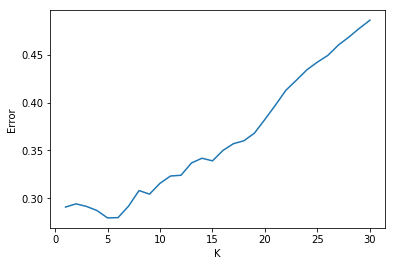

In [32]:
best_K = KNNR_fit(X_Train, Y_Train, X_Valid, Y_Valid, 1, 30)

# 5. Make Prediction

In [33]:
Yhat_Test = KNNR_predict(X_Train, Y_Train, X_Test, best_K)

In [34]:
error_Test = find_MAE(Y_Test, Yhat_Test)

In [35]:
error_Test

0.20098001046378253

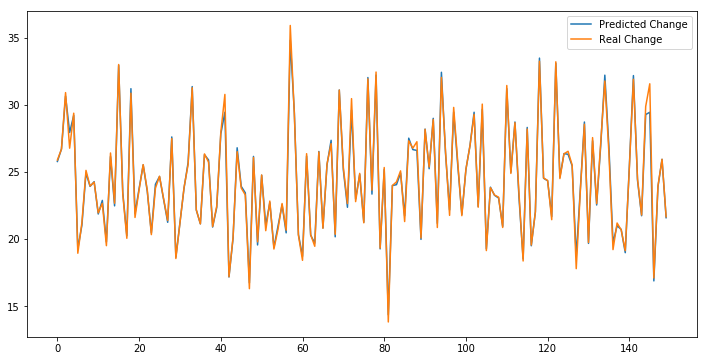

In [36]:
fig = plt.figure(figsize = (12, 6))
plt.plot(Yhat_Test, label = 'Predicted Change')
plt.plot(Y_Test, label = 'Real Change')
plt.legend()

Text(0, 0.5, 'Y')

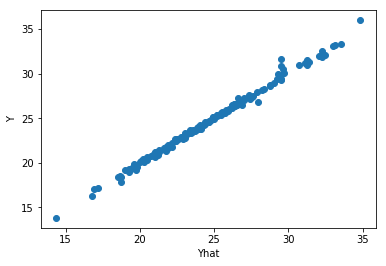

In [37]:
plt.scatter(Yhat_Test, Y_Test)
plt.xlabel('Yhat')
plt.ylabel('Y')

3

K : 3 , error : 0.19619173865377032
K : 5 , error : 0.20098001046378253
K : 4 , error : 0.20143266207634672
K : 6 , error : 0.21487532862764283
K : 2 , error : 0.23767468782083814
K : 7 , error : 0.23875649022743095
K : 8 , error : 0.23929477642849345
K : 9 , error : 0.24805694859358765
K : 10 , error : 0.2615593288326338
K : 11 , error : 0.2715863330847209
K : 12 , error : 0.28085304835012365
K : 13 , error : 0.28939651744695644
K : 14 , error : 0.2968657915406769
K : 15 , error : 0.30343595874055646
K : 17 , error : 0.3040528431412603
K : 1 , error : 0.30693423932621994
K : 16 , error : 0.31189750353939244
K : 18 , error : 0.32004909278022714
K : 19 , error : 0.32509998201483514
K : 20 , error : 0.3287919757445744
K : 21 , error : 0.33944411452330064
K : 22 , error : 0.343154061752638
K : 23 , error : 0.3549912941955668
K : 24 , error : 0.3571023258237235
K : 25 , error : 0.3575543552564462
K : 26 , error : 0.3764182169765102
K : 27 , error : 0.38284582472416434
K : 28 , error : 0

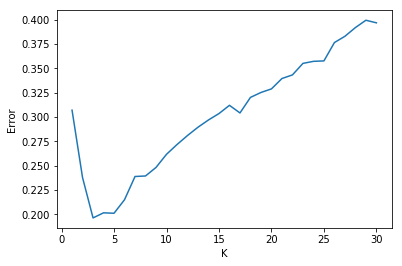

In [38]:
best_K = KNNR_fit(X_Train, Y_Train, X_Test, Y_Test, 1, 30)